### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [1]:
# import libraries

library(ggplot2)

In [2]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [3]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [4]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [5]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


In [6]:
# Create the missing "Gender" and "Birth Year" columns in wash dataset

wash$Gender <- NA
wash$Birth.Year <- NA

# Check the wash dataset
str(wash)

'data.frame':	89051 obs. of  9 variables:
 $ X            : int  1621326 482740 1330037 665458 1481135 1148202 1594275 1601832 574182 327058 ...
 $ Start.Time   : Factor w/ 81223 levels "","2017-01-01 00:11:00",..: 74753 19510 59964 26708 67716 50891 73381 73775 23142 13333 ...
 $ End.Time     : Factor w/ 81217 levels "","2017-01-01 00:14:00",..: 74744 19473 59981 26732 67753 50918 73397 73775 23114 13350 ...
 $ Trip.Duration: num  489 403 637 1827 1549 ...
 $ Start.Station: Factor w/ 478 levels "","10th & E St NW",..: 27 478 66 221 278 84 368 82 71 60 ...
 $ End.Station  : Factor w/ 479 levels "","10th & E St NW",..: 47 219 144 312 315 239 162 376 51 308 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 2 3 3 3 3 3 3 ...
 $ Gender       : logi  NA NA NA NA NA NA ...
 $ Birth.Year   : logi  NA NA NA NA NA NA ...


In [7]:
# Adding city coulmn to for each dataset to before merging the datasets

ny$City <- "NYC"
wash$City <- "Washington"
chi$City <- "Chicago"

In [8]:
# Combining the datasets

bike_data = rbind(ny, chi, wash)
str(bike_data)

'data.frame':	152451 obs. of  10 variables:
 $ X            : int  5688089 4096714 2173887 3945638 6208972 1285652 1675753 1692245 2271331 1558339 ...
 $ Start.Time   : Factor w/ 143945 levels "2017-01-01 00:17:01",..: 45448 32799 17316 31589 49688 10220 13390 13509 18111 12449 ...
 $ End.Time     : Factor w/ 143948 levels "201","2017-01-01 00:30:56",..: 45432 32783 17295 31567 49668 10204 13364 13505 18092 12422 ...
 $ Trip.Duration: num  795 692 1325 703 329 ...
 $ Start.Station: Factor w/ 1585 levels "","1 Ave & E 16 St",..: 522 406 10 93 5 521 325 309 151 245 ...
 $ End.Station  : Factor w/ 1586 levels "","1 Ave & E 16 St",..: 613 8 362 558 269 107 389 110 151 243 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 3 3 3 3 3 2 3 ...
 $ Gender       : Factor w/ 3 levels "","Female","Male": 3 3 3 2 3 3 3 3 1 3 ...
 $ Birth.Year   : num  1998 1981 1987 1986 1992 ...
 $ City         : chr  "NYC" "NYC" "NYC" "NYC" ...


### Question 1


**What is the average travel time for users in different cities?**

In [9]:
# Your solution code goes here

# Calculate average travel time by city
average_time <- aggregate(Trip.Duration ~ City, data = bike_data, FUN = mean)

print(average_time)

        City Trip.Duration
1    Chicago      937.1728
2        NYC      903.6147
3 Washington     1233.9533


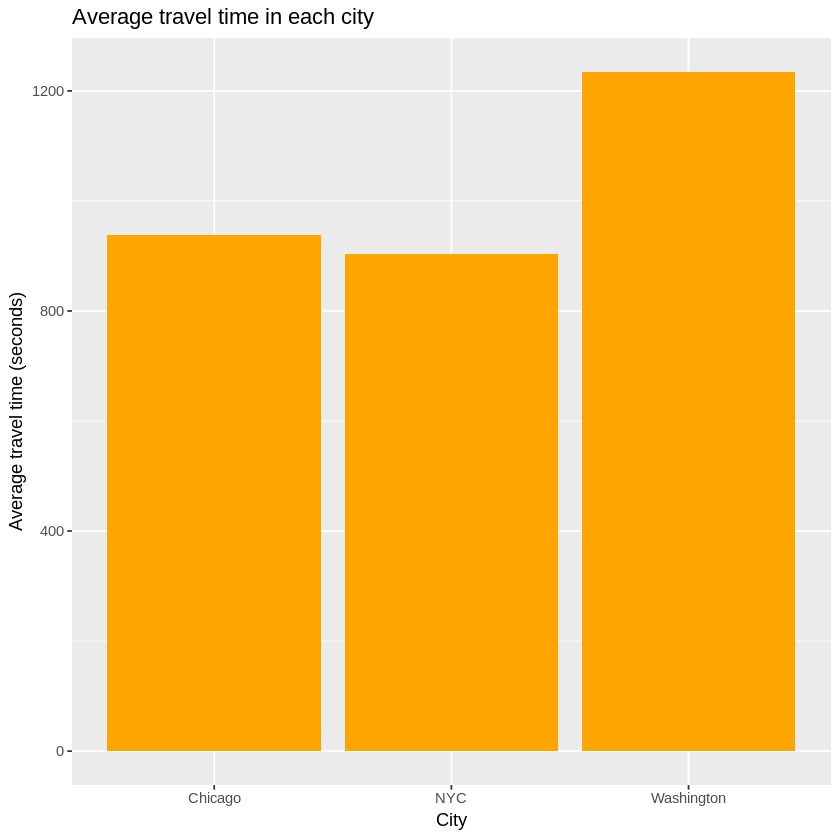

In [10]:
# Create a bar plot for average travel time
ggplot(data = average_time, aes(x = City, y = Trip.Duration))+
    geom_bar(stat = "identity", fill = "orange")+
    labs(title = "Average travel time in each city", x = "City", y = "Average travel time (seconds)")


**Summary:** *The average bike share users travel the least in the New york city, with an average trip duration of 903 seconds (15.05 minutes approx), followed closely by Chicago. Washington DC, has the highest average travel time of bike share users at 1,233 seconds, which is approximately 20.55 minutes. These differences in trip durations show various biking habits across the cities.*

### Question 2

**What are the counts of each user type?**

In [11]:
# Your solution code goes here

# Count occurrences of each user type
user_type_counts <- table(bike_data$User.Type)

user_type_counts


             Customer Subscriber 
       121      30754     121576 

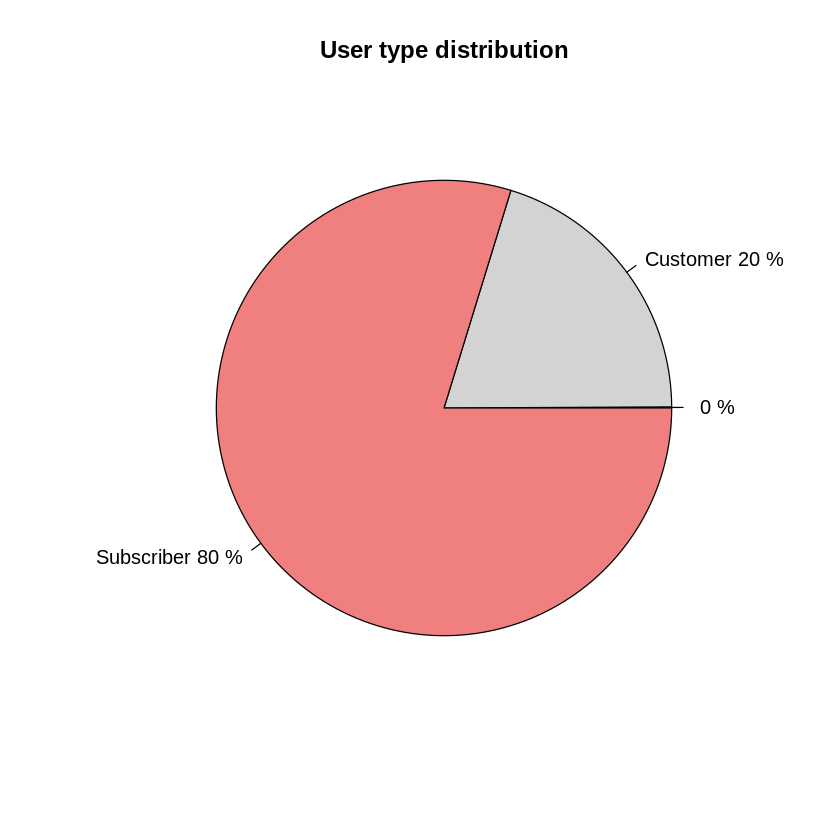

In [12]:
# Pie chart showing the distribution of users

user_counts <- as.vector(user_type_counts)
user_types <- names(user_type_counts)
user_percentage <- round(user_counts / sum(user_counts) * 100)
user_labels <- paste(user_types, user_percentage, "%")

pie(user_counts, labels=user_labels, main="User type distribution", col=c("lightcoral", "lightgray"))


**Summary:** *The bike share dataset has two main categories, cutomers and subscribers namely. The chart shows the distribution of the user types, with Subscribers being 80% of total users and rest 20% are customers. This highlights the preference for subscription based bike sharing, indicating that the people prefer to subscribe to the bike sharing service.*

### Question 3

**What are the counts of each gender (only available for NYC and Chicago)?**

In [13]:
# Your solution code goes here

# Counts of each gender
gender_counts <- table(bike_data$Gender)

gender_counts


       Female   Male 
  7158  13882  42360 

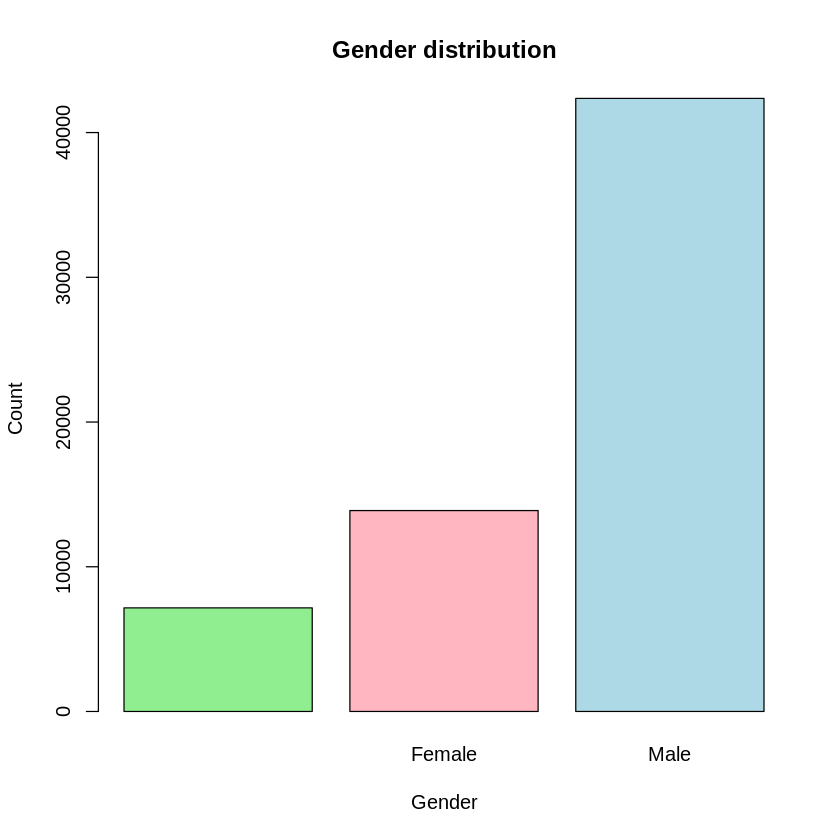

In [14]:
# Bar plot showing gender distribution

barplot(gender_counts,
        xlab = "Gender",
        ylab = "Count",
        col = c("lightgreen", "lightpink", "lightblue"),
        main = "Gender distribution")

**Summary:** *The bike share dataset reveals that there is gender distribution of 7158 female users and 13882 male users. This indicates a disparity with male bike share user, as male users account for a substantial portion of the total user base in the bike share data.* 


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [15]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')